In [20]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm

In [21]:
def generate_data():
    X, y = make_blobs(n_samples=20, centers=2, cluster_std=2.0, random_state=42, )
    y = np.where(y != 0, -1, 1)
    return X, y

X, y = generate_data()

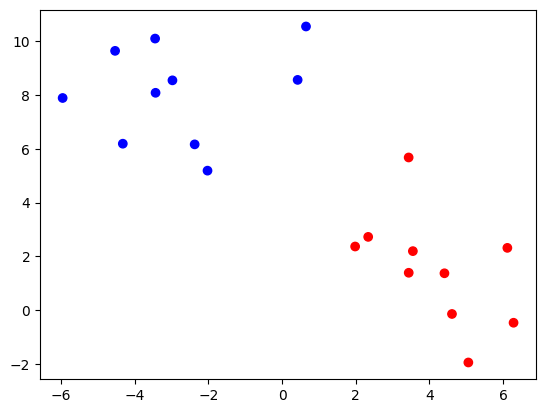

In [22]:
def plot_svm(X, y, w=None, b=None):
    plt.scatter(X[:, 0], X[:, 1], c=['red' if i == -1 else 'blue' for i in y])
    
    if w is not None and b is not None:
        x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
        y_vals = -(w[0] / w[1]) * x_vals - b / w[1]
        
        margin = 1 / np.linalg.norm(w)
        
        plt.plot(x_vals, y_vals, 'k-', label='Decision hyperplane')
        plt.plot(x_vals, y_vals + margin, 'b--', label='Margin +1')
        plt.plot(x_vals, y_vals - margin, 'r--', label='Margin -1')
        
        plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
        plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
        plt.legend()
        plt.show()
        
plot_svm(X, y)

In [23]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.1, n_iters=1000):
        self.lr = learning_rate 
        self.lambda_param = lambda_param  
        self.n_iters = n_iters  
        self.weights = None  
        self.bias = None  

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features) 
        self.bias = 0 

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.weights) + self.bias) >= 1
                if condition:
                    self.weights -= self.lr * (self.lambda_param * self.weights)
                else:
                    self.weights -= self.lr * (self.lambda_param * self.weights - y[idx] * x_i)
                    self.bias += self.lr * y[idx]

    def predict(self, X):
        approx = np.dot(X, self.weights) + self.bias
        return np.sign(approx)

Accuracy: 100.00%


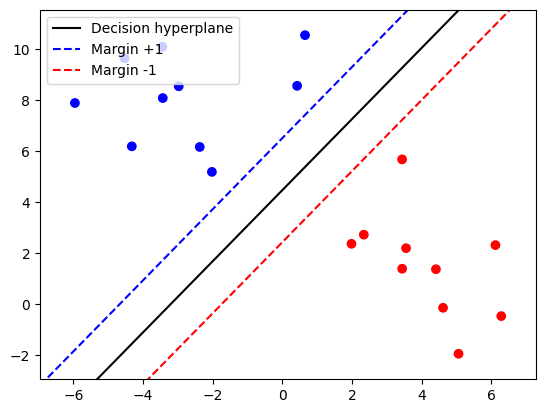

In [24]:
clf1 = SVM(learning_rate=0.001, lambda_param=0.1, n_iters=100000)
clf1.fit(X, y)

predictions = clf1.predict(X)

accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

plot_svm(X, y, w=clf1.weights, b=clf1.bias)

Accuracy: 100.00%


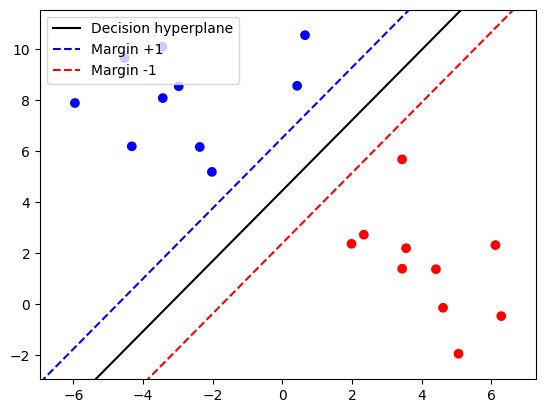

In [25]:
clf2 = svm.SVC(kernel='linear', C=1.0)
clf2.fit(X, y)

predictions = clf2.predict(X)

accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

plot_svm(X, y, w=clf2.coef_[0], b=clf2.intercept_)